In [ ]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


1.Load the data and libraries
2. Data visualization
3. Divide the data into images and labels
4. Divide the data into train and test
5. Apply Ml ALgorithm and evaluate
6. Single Layer Perceptron and evaluate
7. Apply multi-layer perceptron and evaluate
8. IMplement Deep Learning using TensorFlow and Keras

Load the data and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import Perceptron

Import train and test

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


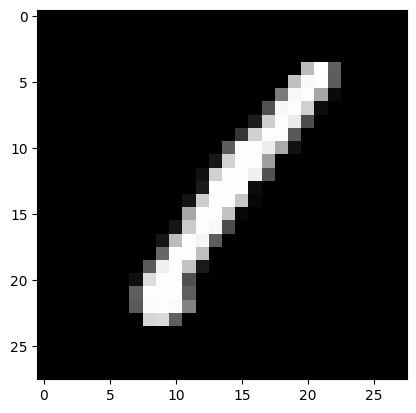

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 0
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
_ = plt.imshow(image_data,cmap='gray')


Divide the data into x and y

In [ ]:
x = train.drop('label',axis=1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


Split the data into train and test

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=10)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


Data Preparation

In [ ]:
x = train.drop('label',axis=1)
y = train['label']

In [ ]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
    conf_matrix = confusion_matrix(actual,predicted)
    class_report = classification_report(actual,predicted)
    acc_score = accuracy_score(actual,predicted)
    print(round(acc_score,2))
    print(class_report)
    print(conf_matrix)


In [ ]:
model_eval(y_train,y_hat_train_rf)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      1.00      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00      1.00      1.00      3267
           7       1.00      1.00      1.00      3541
           8       1.00      1.00      1.00      3246
           9       1.00      1.00      1.00      3361

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600

[[3347    0    0    0    0    0    0    0    0    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   0    0 3339    0    0    0    0    0    0    0]
 [   0    0    0 3493    0    0    0    0    0    0]
 [   0    0    0    0 327

In [ ]:
model_eval(y_test,y_hat_test_rf)

0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       785
           1       0.99      0.98      0.98       949
           2       0.96      0.96      0.96       838
           3       0.95      0.95      0.95       858
           4       0.96      0.97      0.96       796
           5       0.96      0.96      0.96       800
           6       0.98      0.98      0.98       870
           7       0.98      0.96      0.97       860
           8       0.95      0.95      0.95       817
           9       0.95      0.94      0.95       827

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

[[775   0   2   0   1   2   2   0   3   0]
 [  0 932   8   3   1   0   1   0   3   1]
 [  2   1 806  10   2   2   3   3   6   3]
 [  2   1   9 818   1   6   0   8   9   4]
 [  1   2   0   0 769   0   3   2   7  12]
 [  1   0   3  13   1

Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)


In [ ]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

In [ ]:
model_eval(y_test,y_hat_test_gb)

Perceptron

In [ ]:
per = Perceptron()
per.fit(x_train,y_train)
y_hat_train_per = per.predict(x_train)
y_hat_test_per = per.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_per)

0.89
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
           7       0.90      0.92      0.91      3541
           8       0.71      0.92      0.80      3246
           9       0.93      0.66      0.77      3361

    accuracy                           0.89     33600
   macro avg       0.89      0.88      0.88     33600
weighted avg       0.89      0.89      0.89     33600

[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 29

In [ ]:
model_eval(y_test,y_hat_test_per)

0.87
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78       817
           9       0.92      0.62      0.74       827

    accuracy                           0.87      8400
   macro avg       0.87      0.86      0.86      8400
weighted avg       0.87      0.87      0.87      8400

[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3

Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (64,64,64), random_state= 10, verbose = 1)
mlp.fit(x_train,y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.95273596
Iteration 2, loss = 0.60345751
Iteration 3, loss = 0.38434275
Iteration 4, loss = 0.28459711
Iteration 5, loss = 0.22843421
Iteration 6, loss = 0.18899382
Iteration 7, loss = 0.16103116
Iteration 8, loss = 0.14019948
Iteration 9, loss = 0.12564395
Iteration 10, loss = 0.10950937
Iteration 11, loss = 0.09524980
Iteration 12, loss = 0.08663218
Iteration 13, loss = 0.07838298
Iteration 14, loss = 0.07595123
Iteration 15, loss = 0.07231600
Iteration 16, loss = 0.07078196
Iteration 17, loss = 0.07427434
Iteration 18, loss = 0.05745726
Iteration 19, loss = 0.05322779
Iteration 20, loss = 0.04661469
Iteration 21, loss = 0.05271044
Iteration 22, loss = 0.05897661
Iteration 23, loss = 0.04800977
Iteration 24, loss = 0.05529836
Iteration 25, loss = 0.06031530
Iteration 26, loss = 0.06533697
Iteration 27, loss = 0.05729771
Iteration 28, loss = 0.04904064
Iteration 29, loss = 0.03666017
Iteration 30, loss = 0.02982088
Iteration 31, loss = 0.03495027
Iteration 32, los

In [ ]:
model_eval(y_train,y_hat_train_mlp)

0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      0.99      0.99      3339
           3       0.99      1.00      0.99      3493
           4       1.00      0.99      0.99      3276
           5       1.00      0.99      0.99      2995
           6       0.99      1.00      0.99      3267
           7       1.00      0.99      1.00      3541
           8       0.99      1.00      0.99      3246
           9       0.99      0.99      0.99      3361

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600

[[3337    0    1    1    1    0    4    1    0    2]
 [   0 3726    1    0    0    1    0    5    2    0]
 [   0    1 3319    7    0    0    0    1   11    0]
 [   0    2    1 3480    0    4    0    0    3    3]
 [   2    0    1    1 32

In [ ]:
model_eval(y_test,y_hat_test_mlp)

0.96
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       785
           1       0.99      0.98      0.98       949
           2       0.96      0.95      0.95       838
           3       0.93      0.97      0.95       858
           4       0.98      0.94      0.96       796
           5       0.96      0.94      0.95       800
           6       0.97      0.98      0.98       870
           7       0.96      0.96      0.96       860
           8       0.95      0.95      0.95       817
           9       0.94      0.94      0.94       827

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

[[771   0   3   0   0   2   4   1   2   2]
 [  0 933   5   4   0   2   1   0   4   0]
 [  4   2 792  16   0   1   4   5  11   3]
 [  1   3   7 830   0   2   0   5   6   4]
 [  2   2   4   0 747   0   8   4   3  26]
 [  7   0   1  22   1